# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import zipfile
import io
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from google_drive_downloader import GoogleDriveDownloader as gd

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [50]:
url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'

http = urllib3.PoolManager()
print('requesting...')
r = http.request('GET', url)

print(r.status)

requesting...
200


In [51]:
salaries = ''
teams = ''
zipF = io.BytesIO(r.data)
with zipfile.ZipFile(zipF, 'r') as zp:
    print(zp.namelist())
    salaries = zp.open('Salaries.csv')
    teams = zp.open('Teams.csv')
    
df_salary = pd.read_csv(salaries)
df_teams = pd.read_csv(teams)

df_salary.head()
df_teams.head()

['SchoolsPlayers.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv', 'AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Pitching.csv', 'PitchingPost.csv', 'readme2013.txt', 'Salaries.csv', 'Schools.csv']


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [52]:
sumarized = df_salary.groupby(['yearID', 'teamID'], as_index=False)
sumarized = sumarized.sum()

sumarized.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [53]:
df_merged = pd.merge(sumarized, df_teams[['yearID', 'teamID', 'W']], how='inner', on=['teamID', 'yearID'])
df_merged.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

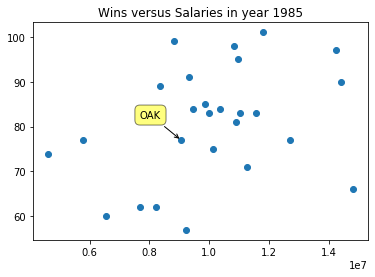

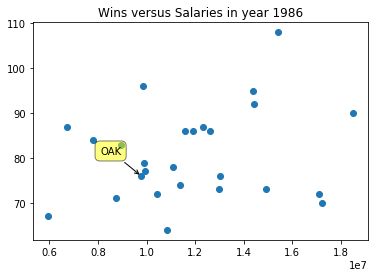

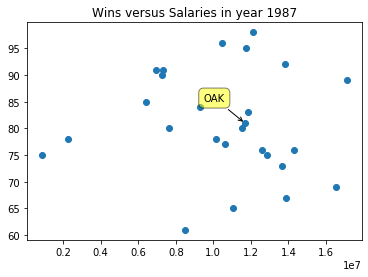

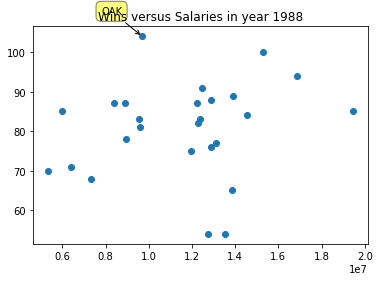

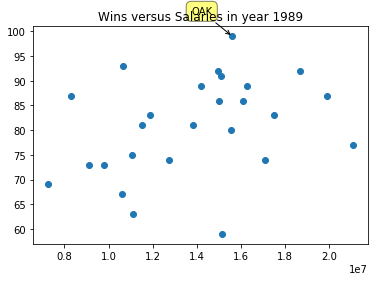

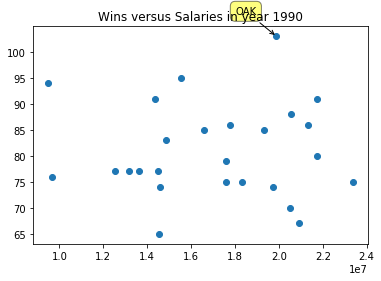

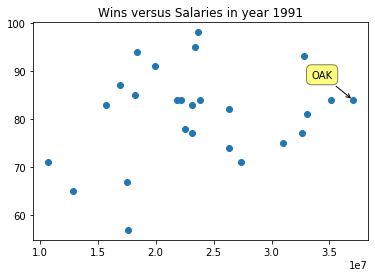

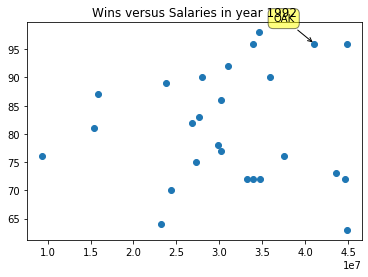

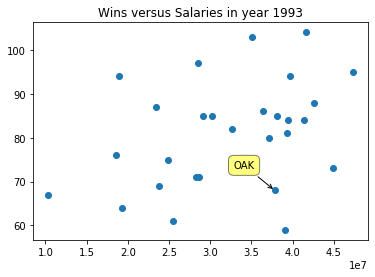

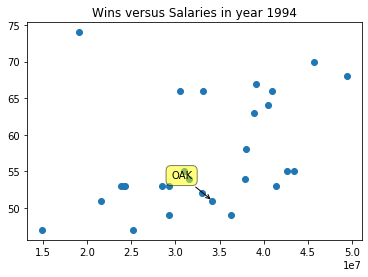

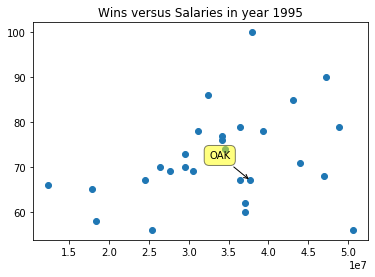

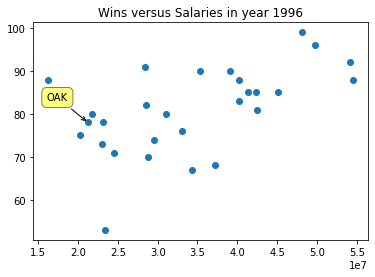

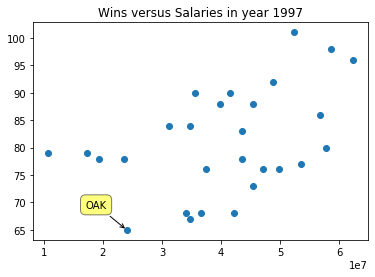

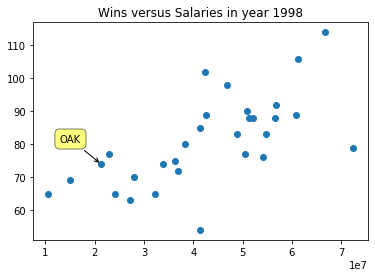

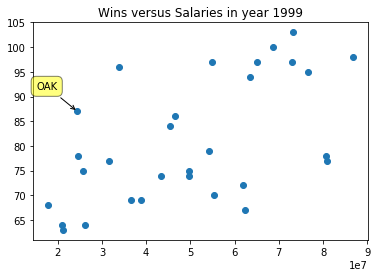

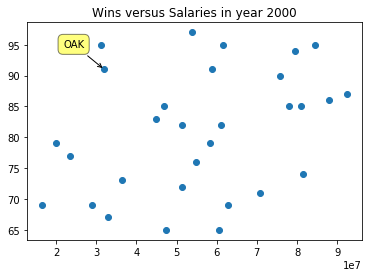

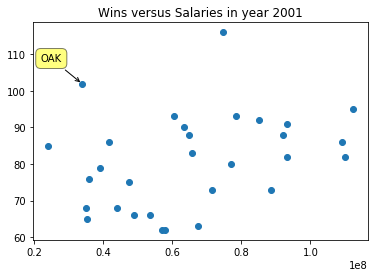

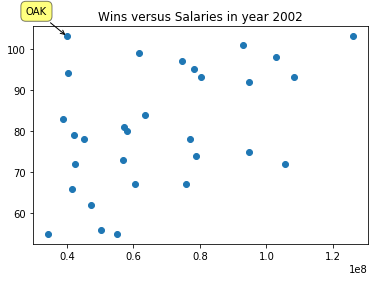

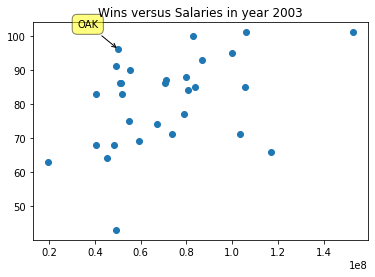

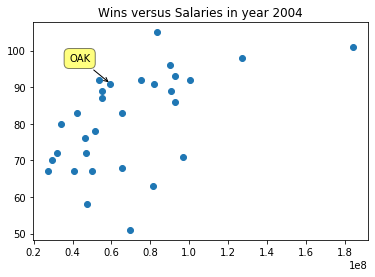

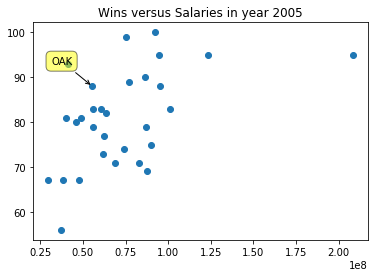

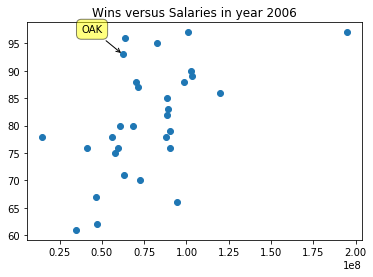

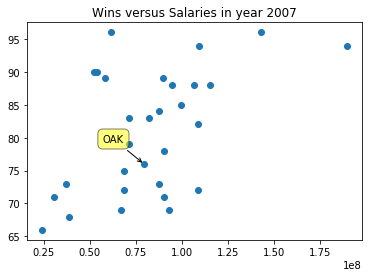

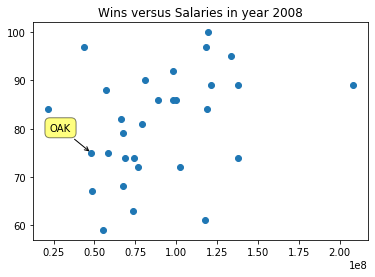

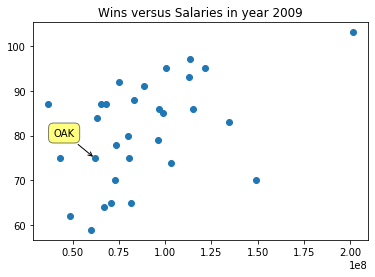

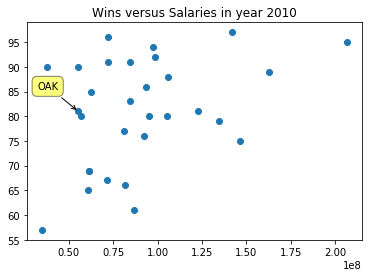

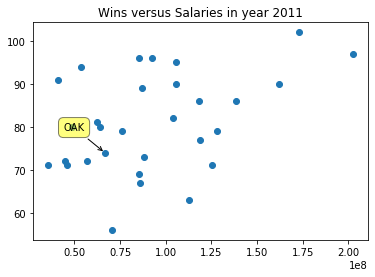

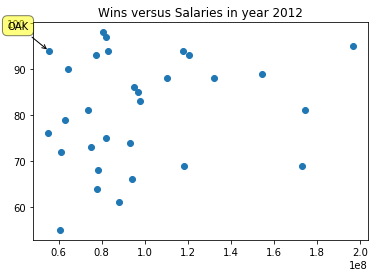

In [54]:
#1999 to 2006
teamName = 'OAK'
for i in np.arange(df_merged.yearID.min(), df_merged.yearID.max()):
    df_year = df_merged[df_merged.yearID == i]
    plt.title('Wins versus Salaries in year ' + str(i))
    plt.scatter(df_year['salary'], df_year['W'])
    plt.annotate(teamName, 
        xy = (df_year['salary'][df_year['teamID'] == teamName],  df_year['W'][df_year['teamID'] == teamName]), 
        xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0'))
    plt.show()

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

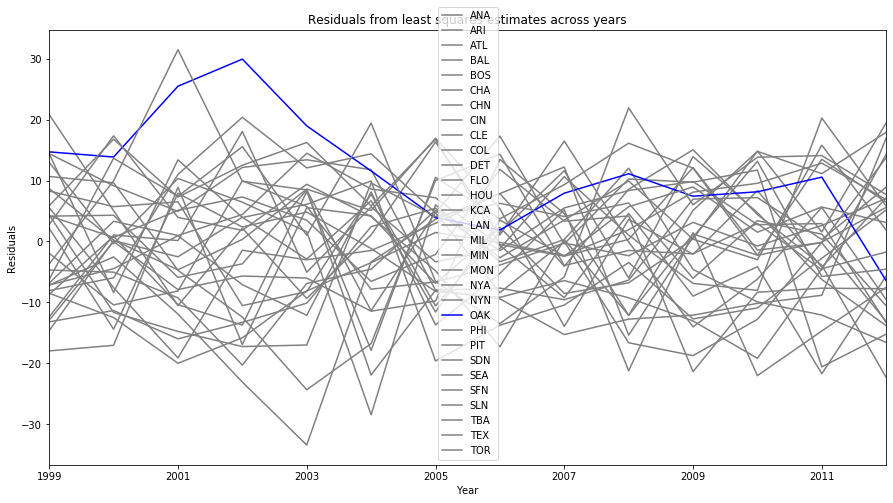

In [59]:
x = pd.DataFrame()
for i in range(1999, df_merged.yearID.max()):
    df_year = df_merged[df_merged.yearID == i]
    res = LinearRegression().fit(list(enumerate(df_year['salary'])), df_year['W'].values)
    x[i] = df_year['W'].values-res.predict(list(enumerate(df_year['salary'])))

x.index = df_merged[df_merged.yearID == 1999]['teamID'].unique()
x = x.T
x.index = x.index.format()

x.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
               color=map(lambda x: 'blue' if x=='OAK' else 'gray',df_merged[df_merged.yearID == 1999]['teamID'].unique()))

plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()
    

###### Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*


From 2001 to 2003 Oakland Baseball team stood out from the other teams. Analysing the residual estimate error in those years, the Oakland team had more than 18 wins per year than the estimate wins given the team salary for the year. The Oakland team managed to achieve this results by expending little in the team salary while having great win percetanges by making better decisions when contracting new players.   

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [29]:
url = 'https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv'
    
http = urllib3.PoolManager()
print('requesting...')
r = http.request('GET', url)

print(r.status)

countries = pd.read_csv(io.BytesIO(r.data))
countries.head()

requesting...
200


,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [30]:
file_id = '1-drXL5txwry-xIySGpJw-hiwlF152uR1'

print('downloading...')
gd.download_file_from_google_drive(file_id=file_id,
                                    dest_path='./data/income.csv')

income = pd.read_csv('./data/income.csv', index_col=0)
income.head()

downloading...


,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1160.0,1220.0,1260.0,1350.0,1350.0,1370.0,1420.0,1460.0,1500.0,1530.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6550.0,6750.0,6910.0,6970.0,7060.0,7200.0,7340.0,7490.0,7640.0,7790.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6170.0,6300.0,6360.0,6420.0,6540.0,6660.0,6800.0,6950.0,7110.0,7270.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34700.0,33100.0,31600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5480.0,5500.0,5550.0,5840.0,6020.0,6270.0,6510.0,6740.0,6730.0,6930.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [31]:
income = income.T
income.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,...,2280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,...,2290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1410.0,...,2290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1410.0,...,2290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1410.0,...,2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

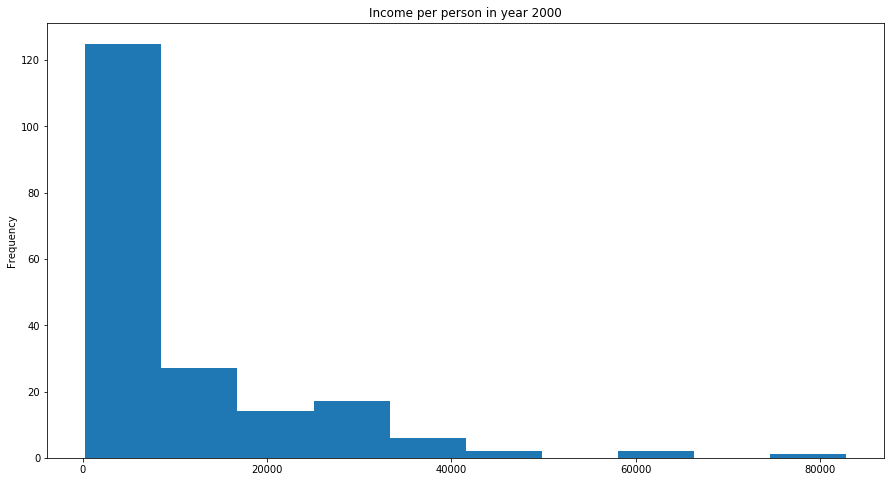

In [32]:
# income.info(verbose=True)
year = '2000'

# income.loc[year].plot(title = 'Income per person in year ' + year, figsize = (15, 8),
#                         kind='bar')

income.loc[year].plot(title = 'Income per person in year ' + year, figsize = (15, 8),
                        kind='hist')

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [33]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
def mergeByYear(year):
    data = pd.DataFrame(income.loc[str(year)].values, columns = ['Income'])
    data['Country'] = income.columns
    return pd.merge(countries, data, how='inner', on='Country')

mergeByYear(2000).head()
    

,Country,Region,Income
0,Algeria,AFRICA,5100.0
1,Angola,AFRICA,2450.0
2,Benin,AFRICA,1310.0
3,Botswana,AFRICA,10100.0
4,Burundi,AFRICA,444.0


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

/home/daniel/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


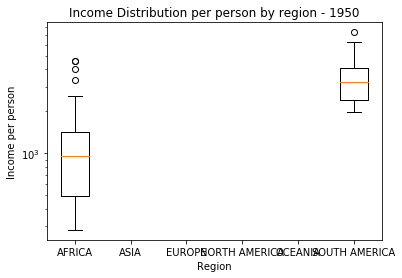

/home/daniel/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


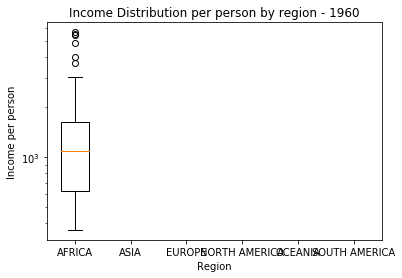

/home/daniel/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


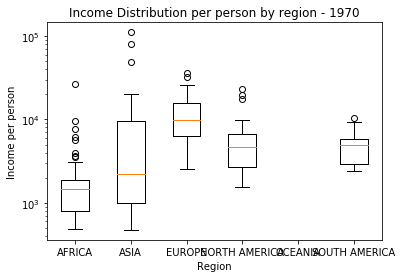

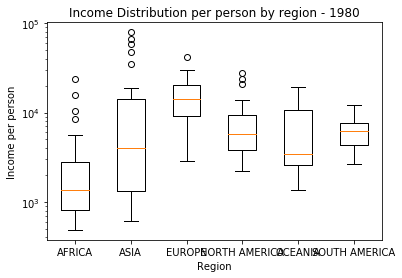

/home/daniel/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/daniel/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


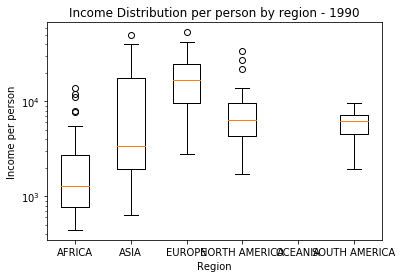

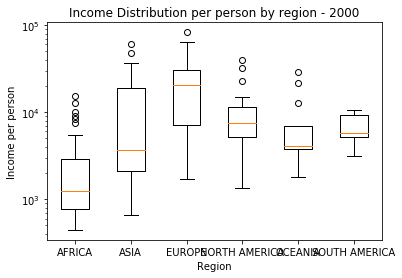

In [34]:
def plot(df, year):
    df_region = [df_region['Income'] for region, df_region in df.groupby('Region')]
#     plt.figure(figsize=(15,8))
#     plt.hist(df_region, label=df['Region'].unique())
#     plt.title('Income Distribution per peson by region')
#     plt.xlabel('Icome per peson')
#     plt.ylabel('Frequency')
#     plt.legend()
    plt.boxplot(df_region, labels=df['Region'].unique())
    plt.title('Income Distribution per person by region - ' + str(year))
    plt.xlabel('Region')
    plt.ylabel('Income per person')
    plt.yscale('log')
    plt.show()

for year in np.arange(1950, 2010, 10):
    plot(mergeByYear(year), year)

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
The income per person has grown in the last century throughout all continents with Asia leading the highest growth. Furthermore, continents historically with high income inequality, such as Asia and Africa, shown a slow march towards income equality. Lastly, South America had the second highest income per person on average in 1950 but shown a slow grow in the subsquent decades, falling to the third place in 2000 and being threat by the fast grow of Asia.

## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [35]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""

def ratioNormals(diff, a):
    X = norm(loc = diff, scale = 1)
    Y = norm(loc = 0, scale = 1)
    return X.sf(a)/Y.sf(a)

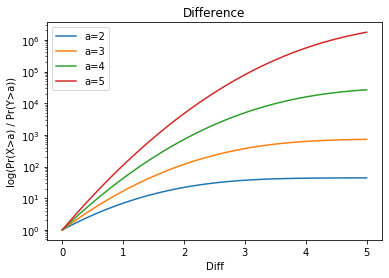

In [36]:

diffs = np.linspace(0, 5, 50)
a_list = range(2, 6)

for a in a_list:
    plt.plot(diffs, [ratioNormals(diff, a) for diff in diffs])

plt.legend(["a="+str(a) for a in a_list])
plt.xlabel('Diff')
plt.ylabel('log(Pr(X>a) / Pr(Y>a))')
plt.title('Difference')
plt.yscale('log')

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [54]:
dfYear = mergeByYear(2012)
dfAsia = dfYear[dfYear['Region'] == 'ASIA']
dfSouth = dfYear[dfYear['Region'] == 'SOUTH AMERICA']


dfAsia.mean()-dfSouth.mean()

Income    5386.621622
dtype: float64

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [67]:
print((dfAsia['Income'] > 10000).sum()/dfAsia['Country'].count())
print((dfSouth['Income'] > 10000).sum()/dfSouth['Country'].count())

0.3783783783783784
0.4166666666666667


South America has a larger proportion of countries with income greater than 10000 dollars. This can be explain because Asia doesn't follow a normal distribution.

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
